In [2]:
from osca import pass_at_k
import json
from collections import Counter
import os

models = ["gpt4o", "deepseek", "qwen"]
locations = ["", "_2-3"]
temps = [0.4, 0.8, 1.2, 1.6]

with open("swebench_agentless.json", "r") as f: 
    data = json.load(f)
    
ks = list(range(1, 17))

settings = [setting["name"] for setting in data["settings"]]
tot_runs_t = {setting["name"]: setting["runs"] for setting in data["settings"]}

In [3]:
pure_pass_at_ks = []

for i, setting in enumerate(settings):
    resolved_instances_list = []
    tot_runs = tot_runs_t[setting]
    pass_at_ks = []
    for k in ks:
        if k > tot_runs:
            continue
        tot = 0
        for j, instance_id in enumerate(data["testing_instances"]):
            tot += pass_at_k(tot_runs, data['test'][str(i)][j], k)
        pass_at_ks.append(tot / len(data["testing_instances"]))
    pure_pass_at_ks.append(pass_at_ks)
    print(f'{setting} pass@{10}: {pass_at_ks[9]}')

gpt4o_0.4 pass@10: 0.33685564435564447
gpt4o_0.4_2-3 pass@10: 0.3301273726273727
gpt4o_0.8 pass@10: 0.36110639360639357
gpt4o_0.8_2-3 pass@10: 0.36420163170163183
gpt4o_1.2 pass@10: 0.3453592241092242
gpt4o_1.2_2-3 pass@10: 0.33809731934731946
gpt4o_1.6 pass@10: 0.14417415917415918
gpt4o_1.6_2-3 pass@10: 0.12696844821844822
deepseek_0.4_2-3 pass@10: 0.20314976689976688
deepseek_0.8 pass@10: 0.19572302697302696
deepseek_1.2 pass@10: 0.2281859806859807
deepseek_1.2_2-3 pass@10: 0.2443165168165168
deepseek_1.6 pass@10: 0.29496586746586745
deepseek_1.6_2-3 pass@10: 0.2825944888444889
qwen_0.4 pass@10: 0.22312562437562433
qwen_0.4_2-3 pass@10: 0.22583250083250084
qwen_0.8 pass@10: 0.2613628038628039
qwen_0.8_2-3 pass@10: 0.2565180652680653
qwen_1.2 pass@10: 0.2934565434565435
qwen_1.2_2-3 pass@10: 0.2699721112221113
qwen_1.6 pass@10: 0.2660693473193473
qwen_1.6_2-3 pass@10: 0.2543935231435231


In [4]:
import random
from collections import Counter
from tqdm import tqdm
import numpy as np

random.seed(42)
uniform_pass_at_ks = []

for k in ks:
    run_avg = []
    for _ in tqdm(range(1000)):
        choices = random.choices(settings, k=k)
        cnt_settings = Counter(choices)
        avg_pass = 0

        for j, instance_id in enumerate(data["testing_instances"]):
            not_pass = 1.0
            for setting in cnt_settings:
                not_pass *= 1 - pass_at_k(tot_runs_t[setting], data['test'][str(settings.index(setting))][j], cnt_settings[setting])
            avg_pass += 1 - not_pass
        
        run_avg.append(avg_pass / len(data["testing_instances"]))
    uniform_pass_at_ks.append(np.mean(run_avg))

print(uniform_pass_at_ks)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:13<00:00, 73.11it/s]

[np.float64(0.14351145833333334), np.float64(0.20486783680555556), np.float64(0.24203140321180558), np.float64(0.26585411340738185), np.float64(0.28516744463501703), np.float64(0.30068013087110945), np.float64(0.31103337083057153), np.float64(0.3199726145793717), np.float64(0.32837457552711674), np.float64(0.33575313172036375), np.float64(0.3428326704941412), np.float64(0.34817150290706383), np.float64(0.3524246000703414), np.float64(0.3574664278379835), np.float64(0.3607950118721098), np.float64(0.36372157906755737)]


In [5]:
!python osca.py swebench_agentless.json --ks 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16

[{'name': 'gpt4o_0.4', 'runs': 16}, {'name': 'gpt4o_0.4_2-3', 'runs': 16}, {'name': 'gpt4o_0.8', 'runs': 16}, {'name': 'gpt4o_0.8_2-3', 'runs': 16}, {'name': 'gpt4o_1.2', 'runs': 16}, {'name': 'gpt4o_1.2_2-3', 'runs': 16}, {'name': 'gpt4o_1.6', 'runs': 16}, {'name': 'gpt4o_1.6_2-3', 'runs': 16}, {'name': 'deepseek_0.4_2-3', 'runs': 16}, {'name': 'deepseek_0.8', 'runs': 16}, {'name': 'deepseek_1.2', 'runs': 16}, {'name': 'deepseek_1.2_2-3', 'runs': 16}, {'name': 'deepseek_1.6', 'runs': 16}, {'name': 'deepseek_1.6_2-3', 'runs': 16}, {'name': 'qwen_0.4', 'runs': 16}, {'name': 'qwen_0.4_2-3', 'runs': 16}, {'name': 'qwen_0.8', 'runs': 16}, {'name': 'qwen_0.8_2-3', 'runs': 16}, {'name': 'qwen_1.2', 'runs': 16}, {'name': 'qwen_1.2_2-3', 'runs': 16}, {'name': 'qwen_1.6', 'runs': 16}, {'name': 'qwen_1.6_2-3', 'runs': 16}]
  0%|                                                    | 0/16 [00:00<?, ?it/s]Test pass rate for 1 samples: 0.21958333333333332
Optimized strategy for 1 samples: [0]

Test p

[np.float64(0.21958333333333332), np.float64(0.2650555555555556), np.float64(0.288672619047619), np.float64(0.3033791208791209), np.float64(0.31343788156288166), np.float64(0.32073301698301715), np.float64(0.32624941724941714), np.float64(0.33055918155918157), np.float64(0.3340177738927739), np.float64(0.33685564435564447), np.float64(0.3392254273504273), np.float64(0.3412289377289377), np.float64(0.34293452380952383), np.float64(0.34438888888888886), np.float64(0.345625), np.float64(0.3466666666666667)]
gpt4o_0.8


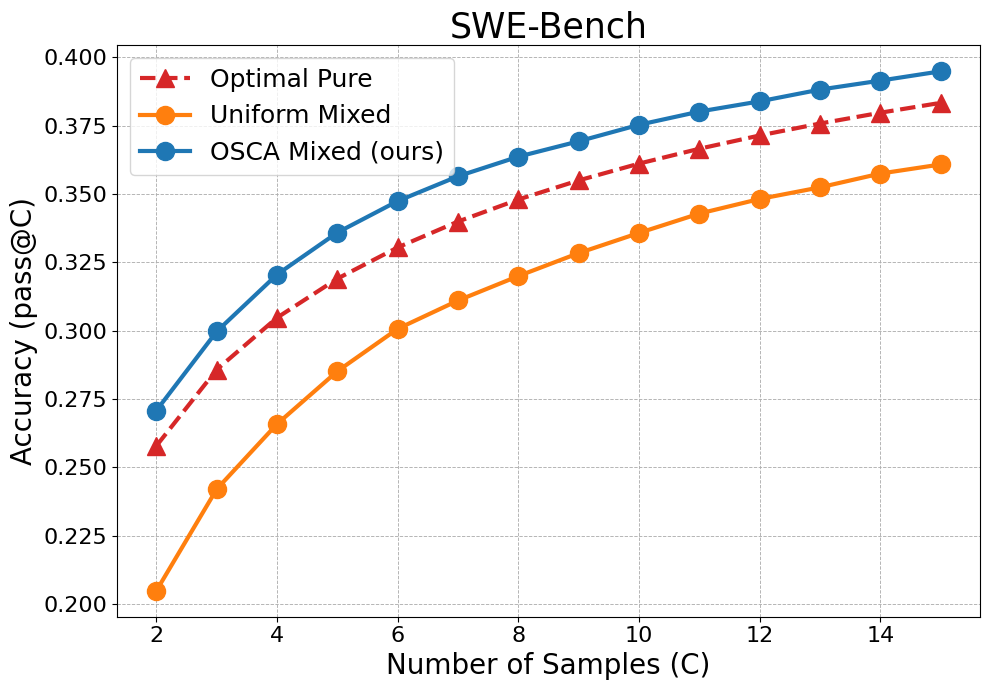

In [6]:
import matplotlib.pyplot as plt


# Learned strategy should be copied from the output of the above OSCA command.
learned_strategy = [np.float64(0.21958333333333332), np.float64(0.27079427083333335), np.float64(0.2996980794270833), np.float64(0.32053667534722213), np.float64(0.3358920355902777), np.float64(0.3474069444444444), np.float64(0.35647654651460187), np.float64(0.3636466810438368), np.float64(0.36927381342327786), np.float64(0.37530550214140995), np.float64(0.38013988518727376), np.float64(0.38387730088784133), np.float64(0.3881848849148967), np.float64(0.39146515173896523), np.float64(0.39486197570772924), np.float64(0.39792607926078294)]


print(pure_pass_at_ks[0])

plt.figure(figsize=(10, 7))
for i, setting in enumerate(settings):
    if setting == "gpt4o_0.8":
        print(setting)
        plt.plot(ks[1:15], pure_pass_at_ks[i][1:15], linestyle='--', marker='^', label=f'Optimal Pure', markersize=13, linewidth=3, color='tab:red')

plt.plot(ks[1:15], uniform_pass_at_ks[1:15], marker='o', label='Uniform Mixed', markersize=13, linewidth=3, color='tab:orange')
#plt.plot(runs, uniform_across_2, marker='o', label='Uniform across 2')
#plt.plot(runs, uniform_across_3, marker='o', label='Uniform across 3')
plt.plot(ks[1:15], learned_strategy[1:15], marker='o', label='OSCA Mixed (ours)', markersize=13, linewidth=3, color='tab:blue')

handles, labels = plt.gca().get_legend_handles_labels()
legend_order = {
    'OSCA Mixed (ours)': 1,
    'Uniform Mixed': 2,
    'Optimal Pure': 3,
}

# Sort the labels and handles
sorted_labels_handles = sorted(zip(labels, handles), key=lambda x: legend_order[x[0]])
labels, handles = zip(*sorted_labels_handles)

plt.legend(handles, labels, fontsize=18)

plt.title('SWE-Bench', fontsize=25)

plt.xlabel('Number of Samples (C)', fontsize=20)
plt.ylabel('Accuracy (pass@C)', fontsize=20)
plt.legend(fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.65)

plt.tight_layout()
plt.savefig('swe.png')
plt.show()